In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data/mushrooms.csv")

In [6]:
# visualize dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.columns.values
# Label that we have to predict
# e stands for edible, p stands for poisonous
y = df.pop("class").values

In [8]:
X = df
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [9]:
from sklearn.model_selection import train_test_split
# Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [10]:
# Define Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

In [11]:
# Train data 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
encoder = ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'))
classifier = ('classifier', clf)
# steps = [encoder]
pipe = Pipeline([encoder, classifier])

pipe.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, ...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])

In [12]:
# See the score on training data
pipe.score(X_train, y_train)

1.0

In [13]:
# See the score on Test data
pipe.score(X_test, y_test)

1.0

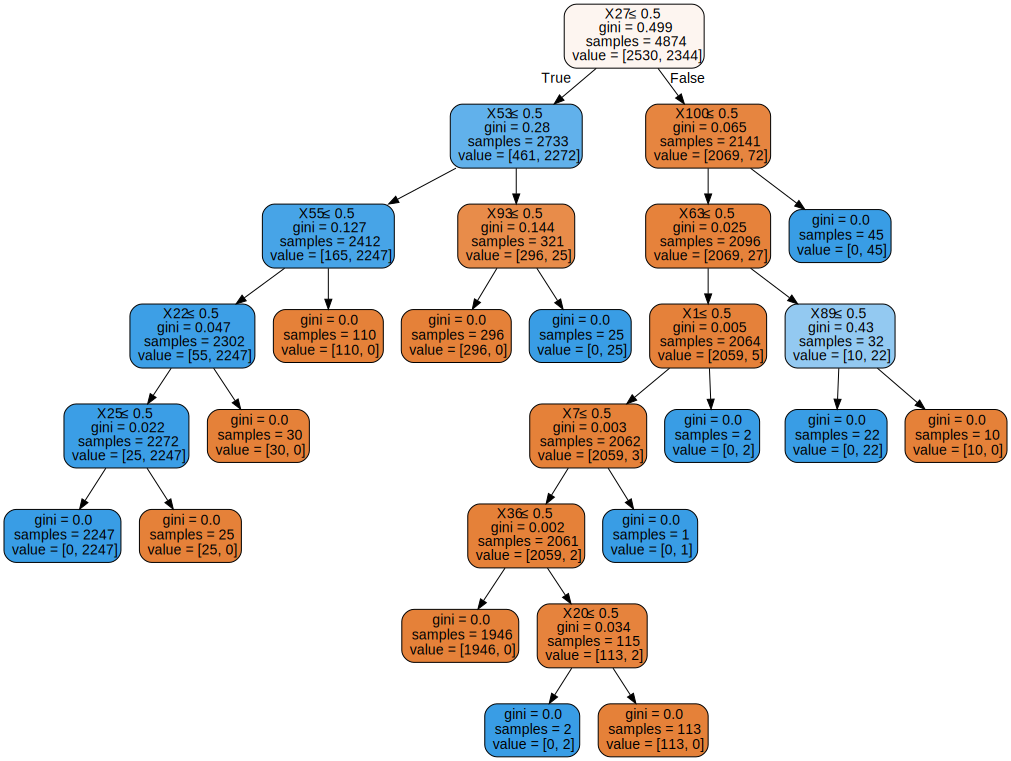

In [19]:
# Visualize the decision tree constructed
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph